In [1]:
__author__ = 'Elliot I. Simon'
__email__ = 'ellsim@dtu.dk'
__version__ = 'October 18, 2021'

This program processes the Globe offshore tilt measurements during installation to find the offsets representing the zero-tilt position

In [2]:
import os
import zipfile
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#from scipy.signal import periodogram
import glob

In [3]:
%matplotlib notebook
#%matplotlib inline

In [4]:
pd.options.display.float_format = '{:.5f}'.format
plt.rcParams['figure.figsize'] = [10, 8]

# Data loading/processing

In [5]:
!pwd

/m/Documents/GloBE/Tilt_data


In [6]:
# Give system name
sys = 'Globe7'

In [7]:
inpath = r'M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7'

In [8]:
outpath = 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\'

In [9]:
# Globe #3 doesn't have the Gyro. All the rest do
if sys == 'Globe3':
    numchannels = 11
else:
    numchannels = 26

In [10]:
# Offsets to each system for X_inc, Y_inc, Pitch, Roll, Yaw when turbine is shutdown
# Todo: Find period with shutdown and determine these..
if sys == 'Globe1':
    offsets = {"X_inc": 0, "Y_inc": 0, "Pitch": 0, "Roll": 0, "Yaw": 0}
elif sys == 'Globe2':
    offsets = {"X_inc": 0, "Y_inc": 0, "Pitch": 0, "Roll": 0, "Yaw": 0}
elif sys == 'Globe3':
    offsets = {"X_inc": 0, "Y_inc": 0}
elif sys == 'Globe4':
    offsets = {"X_inc": 0, "Y_inc": 0, "Pitch": 0, "Roll": 0, "Yaw": 0}
elif sys == 'Globe5':
    offsets = {"X_inc": 0, "Y_inc": 0, "Pitch": 0, "Roll": 0, "Yaw": 0}
elif sys == 'Globe6':
    offsets = {"X_inc": 0, "Y_inc": 0, "Pitch": 0, "Roll": 0, "Yaw": 0}
elif sys == 'Globe7':
    offsets = {"X_inc": 0, "Y_inc": 0, "Pitch": 0, "Roll": 0, "Yaw": 0}

In [11]:
# Find all zipfiles in path
zipfiles = glob.glob(inpath+'\\*.zip')

In [12]:
zipfiles

['M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\globe7_20210806_0600.zip',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\globe7_20210806_0610.zip',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\globe7_20210806_0620.zip',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\globe7_20210806_0630.zip',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\globe7_20210806_0820.zip',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\globe7_20210806_0830.zip',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\globe7_20210806_0840.zip',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\globe7_20210806_0850.zip',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\globe7_20210806_0900.zip',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\globe7_20210806_0910.zip',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\globe7_20210806_0920.zip',

In [ ]:
# Linux method to unzip
!cd ".\tilt_datasample\Globe1_tiltsample\2021\09\22\"
!while [ "`find . -type f -name '*.zip' | wc -l`" -gt 0 ]; do find -type f -name "*.zip" -exec unzip -- '{}' \; -exec rm -- '{}' \;; done

In [13]:
# Windows method to unzip (only extract .tim files from archive)
for zf in zipfiles:
    with zipfile.ZipFile(zf,"r") as zip_ref:
        [zip_ref.extract(file, path=outpath+'\\bin') for file in zip_ref.namelist() if file.endswith('.tim')]

In [ ]:
#Powershell script code:
#Get-Childitem -File -filter "*.tim" | Foreach {C:\Users\elliot\Documents\GloBE\bin2asc\bin2asc.exe $_.FullName ..\ascii\$_ 14 "%6.3f"}
#Dir ..\ascii\*.tim | rename-item -newname { [io.path]::ChangeExtension($_.name, "txt") }

In [14]:
binfiles = glob.glob(outpath+'bin\\'+'*.tim')

In [15]:
binfiles

['M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\bin\\globe7_20210806_0600_000016.tim',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\bin\\globe7_20210806_0610_000016.tim',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\bin\\globe7_20210806_0620_000016.tim',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\bin\\globe7_20210806_0630_000016.tim',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\bin\\globe7_20210806_0820_000016.tim',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\bin\\globe7_20210806_0830_000016.tim',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\bin\\globe7_20210806_0840_000016.tim',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\bin\\globe7_20210806_0850_000016.tim',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\bin\\globe7_20210806_0900_000016.tim',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\bin\\glob

In [16]:
# Run binary to ascii conversion on all binary files
for f in binfiles:
    asciifile = f.split('\\')[-1].split('.tim')[0]+'.tsv'
    asciifile = outpath + 'ascii\\' + asciifile
    print(asciifile)
    os.system("bin2asc.exe {0} {1} {2} {3}".format(f, asciifile, numchannels, "%6.3f"))

M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7\ascii\globe7_20210806_0600_000016.tsv
M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7\ascii\globe7_20210806_0610_000016.tsv
M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7\ascii\globe7_20210806_0620_000016.tsv
M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7\ascii\globe7_20210806_0630_000016.tsv
M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7\ascii\globe7_20210806_0820_000016.tsv
M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7\ascii\globe7_20210806_0830_000016.tsv
M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7\ascii\globe7_20210806_0840_000016.tsv
M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7\ascii\globe7_20210806_0850_000016.tsv
M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7\ascii\globe7_20210806_0900_000016.tsv
M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7\ascii\globe7_20210806_0910_000016.tsv
M:\Documents\GloBE\Motion_sensor_zero_calibration\

M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7\ascii\globe7_20210806_2210_000016.tsv
M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7\ascii\globe7_20210806_2220_000016.tsv
M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7\ascii\globe7_20210806_2230_000016.tsv
M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7\ascii\globe7_20210806_2240_000016.tsv
M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7\ascii\globe7_20210806_2250_000016.tsv
M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7\ascii\globe7_20210806_2300_000016.tsv
M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7\ascii\globe7_20210806_2310_000016.tsv
M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7\ascii\globe7_20210806_2320_000016.tsv
M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7\ascii\globe7_20210806_2330_000016.tsv
M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7\ascii\globe7_20210806_2340_000016.tsv
M:\Documents\GloBE\Motion_sensor_zero_calibration\

In [17]:
# List converted ascii files
tsvfiles = glob.glob(outpath + 'ascii\\' + '*.tsv')
tsvfiles = sorted(([str(f) for f in tsvfiles]))

In [18]:
tsvfiles

['M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\ascii\\globe7_20210806_0600_000016.tsv',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\ascii\\globe7_20210806_0610_000016.tsv',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\ascii\\globe7_20210806_0620_000016.tsv',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\ascii\\globe7_20210806_0630_000016.tsv',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\ascii\\globe7_20210806_0820_000016.tsv',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\ascii\\globe7_20210806_0830_000016.tsv',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\ascii\\globe7_20210806_0840_000016.tsv',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\ascii\\globe7_20210806_0850_000016.tsv',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\\Globe7\\ascii\\globe7_20210806_0900_000016.tsv',
 'M:\\Documents\\GloBE\\Motion_sensor_zero_calibration\

In [19]:
%%time
df = pd.concat(map(lambda f: pd.read_csv(f, delim_whitespace=True, header=None), tsvfiles))

Wall time: 47.9 s


In [20]:
# Rename columns to match channel names
if sys == 'Globe3':
    df.columns = ['YY', 'MT', 'DD', 'HH', 'MM', 'SS', 'RTC_MS', 'Temp_inc', 'X_inc', 'Y_inc', 'Inc_stat']
else:
    df.columns = ['YY', 'MT', 'DD', 'HH', 'MM', 'SS', 'RTC_MS', 'Gyro_MS', 'AX', 'AY', 'AZ', 'GX', 'GY', 'GZ', 'HX', 'HY', 'HZ', 
             'Roll', 'Pitch', 'Yaw', 'Temp_gyro', 'Gyro_stat', 'Temp_inc', 'X_inc', 'Y_inc', 'Inc_stat']

In [21]:
# Apply offsets
if sys == 'Globe3':
    df['X_inc'] += offsets['X_inc']
    df['Y_inc'] += offsets['Y_inc']
else:
    df['X_inc'] += offsets['X_inc']
    df['Y_inc'] += offsets['Y_inc']
    df['Pitch'] += offsets['Pitch']
    df['Roll'] += offsets['Pitch']
    df['Yaw'] += offsets['Pitch']

In [22]:
df.head()

,YY,MT,DD,HH,MM,SS,RTC_MS,Gyro_MS,AX,AY,...,HZ,Roll,Pitch,Yaw,Temp_gyro,Gyro_stat,Temp_inc,X_inc,Y_inc,Inc_stat
0,2021.00000,8.00000,6.00000,6.00000,0.00000,11.00000,567.37400,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,4.00000,0.00000,0.00000,0.00000,4.00000
1,2021.00000,8.00000,6.00000,6.00000,0.00000,11.00000,630.33800,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,4.00000,20.30000,-0.09900,-0.08400,0.00000
2,2021.00000,8.00000,6.00000,6.00000,0.00000,11.00000,692.30300,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,4.00000,20.30000,-0.11700,-0.07700,0.00000
3,2021.00000,8.00000,6.00000,6.00000,0.00000,11.00000,755.26700,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,4.00000,20.30000,-0.11200,-0.10100,0.00000
4,2021.00000,8.00000,6.00000,6.00000,0.00000,11.00000,817.23100,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,4.00000,20.30000,-0.10900,-0.12100,0.00000


In [23]:
%%time
# Force conversion to int to remove trailing decimals, then force conversion to str to comply with datetime formatter
df['YY'] = df['YY'].astype(int).astype(str)
df['MT'] = df['MT'].astype(int).astype(str)
df['DD'] = df['DD'].astype(int).astype(str)
df['HH'] = df['HH'].astype(int).astype(str)
df['MM'] = df['MM'].astype(int).astype(str)
df['SS'] = df['SS'].astype(int).astype(str)
# Convert to microseconds to use with to_datetime
# Realtime clock from computer
df['RTC_US'] = (df['RTC_MS']*1000).astype(int).astype(str)
# Time from gyro sampling timestamp
#df['Gyro_US'] = (df['Gyro_MS']*1000).astype(int).astype(str)

Wall time: 4.18 s


In [24]:
# Build datetime string from clock channels
df['dt'] = pd.to_datetime(df['YY'] + '-' + df['MT'] + '-' + df['DD'] + ' ' + 
               df['HH'] + ':' + df['MM'] + ':' + 
               df['SS'] + ':' + df['RTC_US'], 
               format = '%Y-%m-%d %H:%M:%S:%f')
df.set_index(df['dt'], inplace=True)

In [25]:
# Delete unneeded columns to save space
del df['dt']
del df['RTC_US']
del df['YY']
del df['MT']
del df['DD']
del df['HH']
del df['MM']
del df['SS']

In [26]:
df.head()

,RTC_MS,Gyro_MS,AX,AY,AZ,GX,GY,GZ,HX,HY,HZ,Roll,Pitch,Yaw,Temp_gyro,Gyro_stat,Temp_inc,X_inc,Y_inc,Inc_stat
dt,,,,,,,,,,,,,,,,,,,,
2021-08-06 06:00:11.567374,567.37400,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.00000,0.00000,0.00000,0.00000,4.00000
2021-08-06 06:00:11.630338,630.33800,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.00000,20.30000,-0.09900,-0.08400,0.00000
2021-08-06 06:00:11.692303,692.30300,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.00000,20.30000,-0.11700,-0.07700,0.00000
2021-08-06 06:00:11.755267,755.26700,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.00000,20.30000,-0.11200,-0.10100,0.00000
2021-08-06 06:00:11.817231,817.23100,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.00000,20.30000,-0.10900,-0.12100,0.00000


In [27]:
# Save result to hdf5 file
# Make filename from the time range contained in the dataframe
outfile = str(df.first_valid_index()).split('.')[0].replace(' ','_').replace('-','_').replace(':','_') + '-' + str(df.last_valid_index()).split('.')[0].replace(' ','_').replace('-','_').replace(':','_')
outfile = outpath + 'hdf\\' + sys + '_tiltdata_' + outfile + '.hdf'
print(outfile)
df.to_hdf(outfile, key='df', complib='blosc')

M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7\hdf\Globe7_tiltdata_2021_08_06_06_00_11-2021_08_07_00_00_11.hdf


<IPython.core.display.Javascript object>


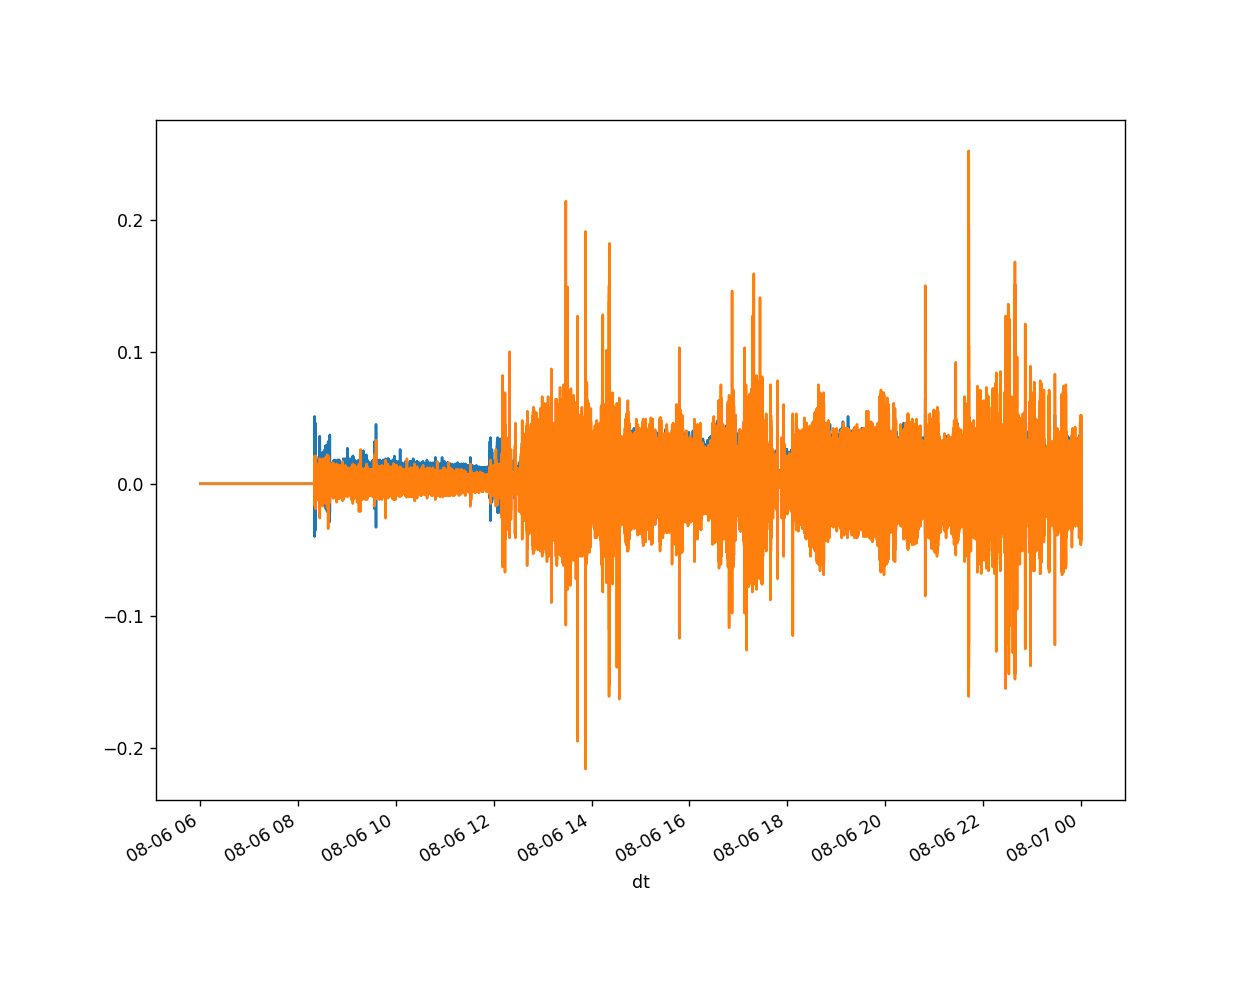

In [29]:
df['AX'].plot(linewidth=0, marker='.')
df['AY'].plot(linewidth=0, marker='.')

<IPython.core.display.Javascript object>


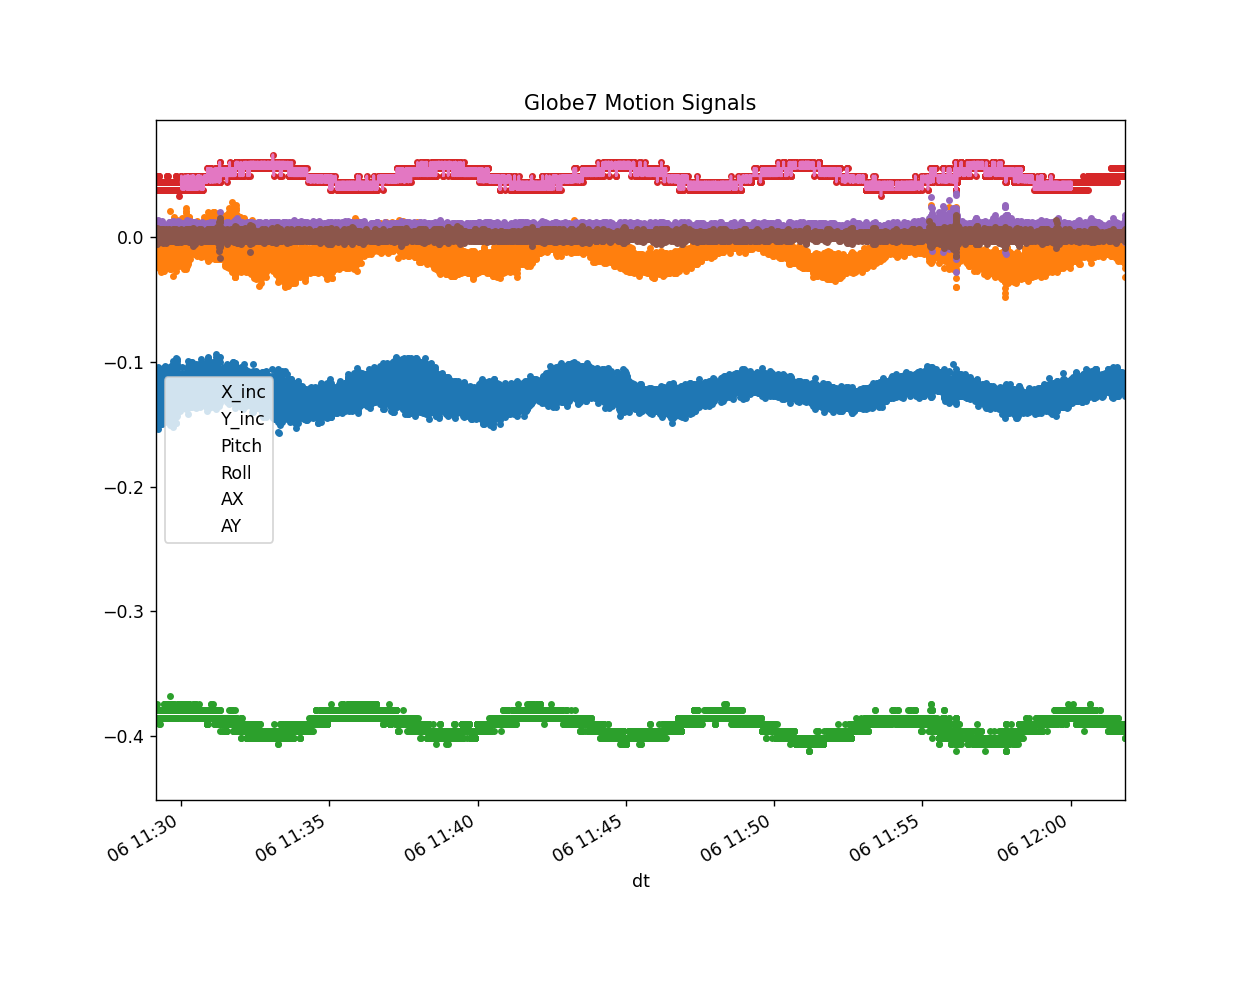

Text(0.5, 1.0, 'Globe7 Motion Signals')

In [37]:
df['X_inc'].plot(linewidth=0, marker='.')
df['Y_inc'].plot(linewidth=0, marker='.')
df['Pitch'].plot(linewidth=0, marker='.')
df['Roll'].plot(linewidth=0, marker='.')
df['AX'].plot(linewidth=0, marker='.')
df['AY'].plot(linewidth=0, marker='.')
#df['GX'].plot(linewidth=0, marker='.')
#df['GY'].plot(linewidth=0, marker='.')
plt.legend()
plt.title(str(sys) + ' Motion Signals')

In [57]:
df_cal = df.loc['2021-08-06 11:30:00':'2021-08-06 12:00:00']

<ipython-input-57-ac211d3e388e>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_cal = df.loc['2021-08-06 11:30:00':'2021-08-06 12:00:00']


<IPython.core.display.Javascript object>


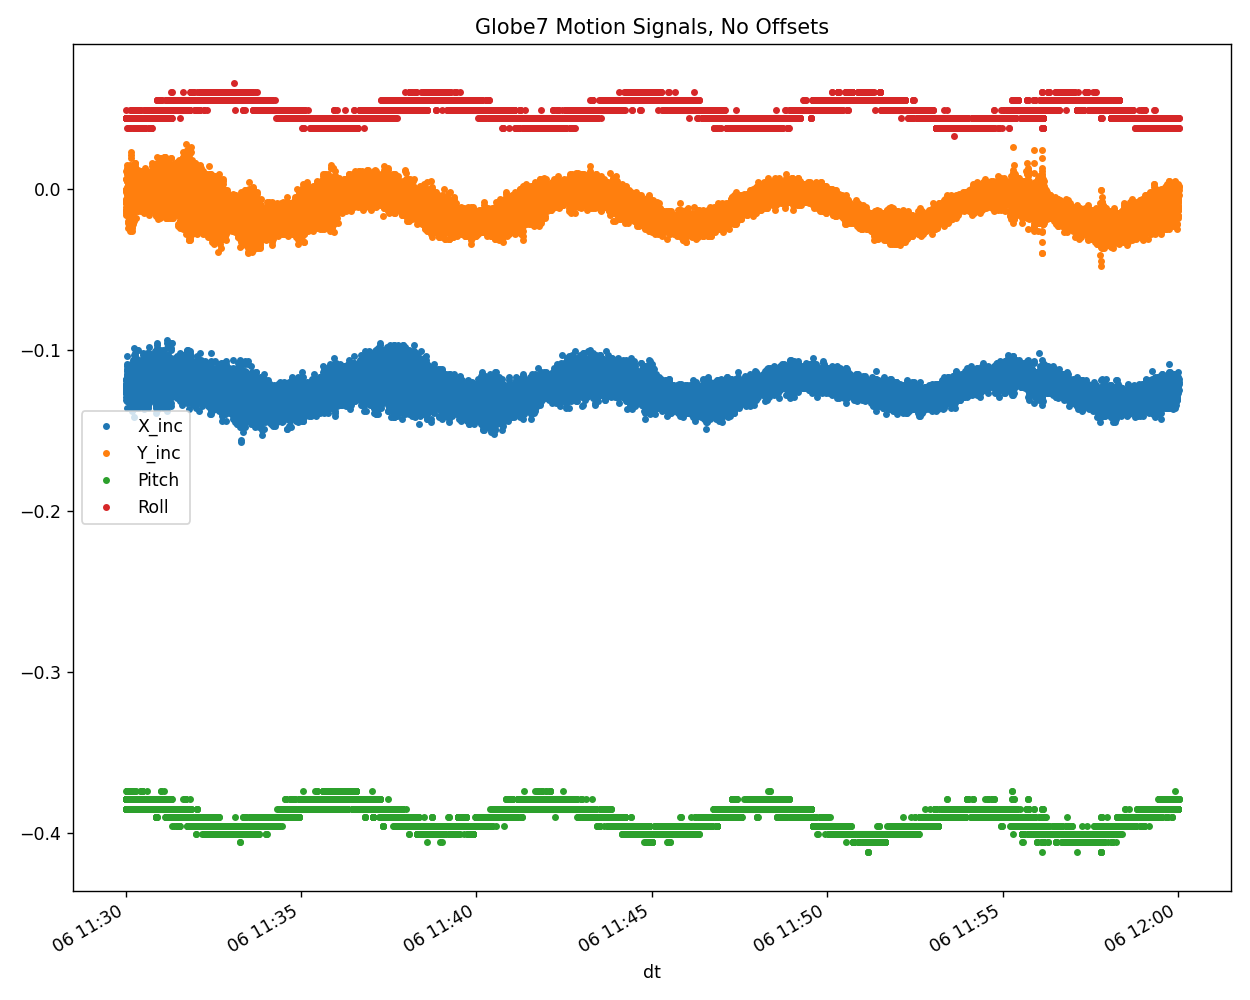

In [58]:
df_cal['X_inc'].plot(linewidth=0, marker='.')
df_cal['Y_inc'].plot(linewidth=0, marker='.')
df_cal['Pitch'].plot(linewidth=0, marker='.')
df_cal['Roll'].plot(linewidth=0, marker='.')
plt.legend()
plt.title(str(sys) + ' Motion Signals, No Offsets')
plt.gcf().tight_layout()

In [59]:
X_inc_offset = df_cal['X_inc'].mean()
Y_inc_offset = df_cal['Y_inc'].mean()
Pitch_offset = df_cal['Pitch'].mean()
Roll_offset = df_cal['Roll'].mean()

print(str(sys) + ' X_inc channel offset = ' + str(X_inc_offset))
print(str(sys) + ' Y_inc channel offset = ' + str(Y_inc_offset))
print(str(sys) + ' Pitch channel offset = ' + str(Pitch_offset))
print(str(sys) + ' Roll channel offset = ' + str(Roll_offset))

Globe7 X_inc channel offset = -0.12428817323708999
Globe7 Y_inc channel offset = -0.011538277345918245
Globe7 Pitch channel offset = -0.3909462798445478
Globe7 Roll channel offset = 0.04853026096613039


In [60]:
df_cal['X_inc'] -= X_inc_offset
df_cal['Y_inc'] -= Y_inc_offset
df_cal['Pitch'] -= Pitch_offset
df_cal['Roll'] -= Roll_offset

<IPython.core.display.Javascript object>


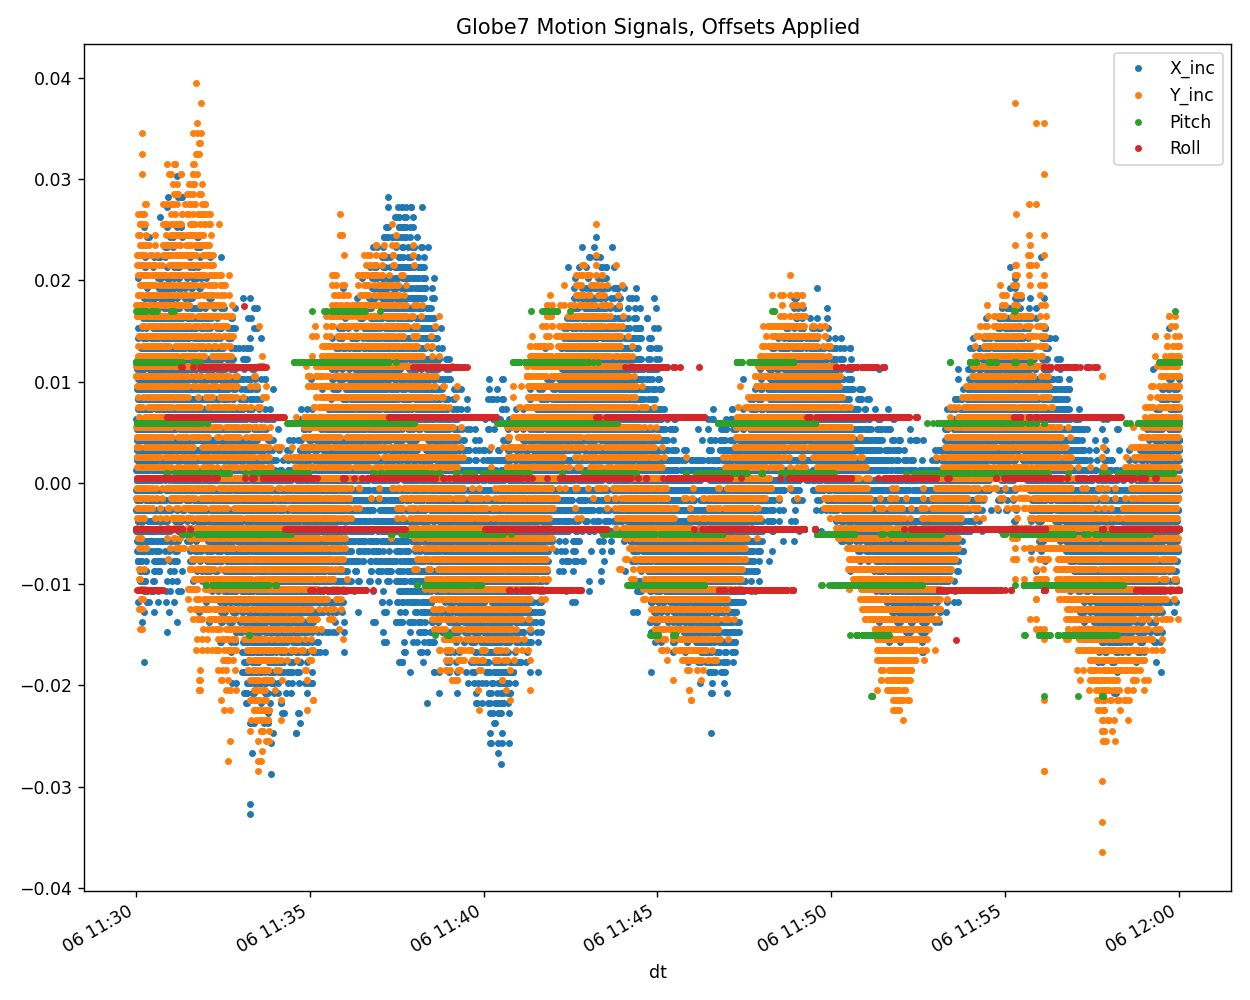

In [61]:
df_cal['X_inc'].plot(linewidth=0, marker='.')
df_cal['Y_inc'].plot(linewidth=0, marker='.')
df_cal['Pitch'].plot(linewidth=0, marker='.')
df_cal['Roll'].plot(linewidth=0, marker='.')
plt.legend()
plt.title(str(sys) + ' Motion Signals, Offsets Applied')
plt.gcf().tight_layout()

In [66]:
print(df_cal['X_inc'].describe())
print('_____________________________')
print(df_cal['Y_inc'].describe())
print('_____________________________')
print(df_cal['Pitch'].describe())
print('_____________________________')
print(df_cal['Roll'].describe())

count   28816.00000
mean       -0.00000
std         0.00792
min        -0.03271
25%        -0.00571
50%        -0.00071
75%         0.00529
max         0.03029
Name: X_inc, dtype: float64
_____________________________
count   28816.00000
mean       -0.00000
std         0.00951
min        -0.03646
25%        -0.00746
50%        -0.00046
75%         0.00754
max         0.03954
Name: Y_inc, dtype: float64
_____________________________
count   28816.00000
mean        0.00000
std         0.00758
min        -0.02105
25%        -0.00505
50%         0.00095
75%         0.00595
max         0.01695
Name: Pitch, dtype: float64
_____________________________
count   28816.00000
mean       -0.00000
std         0.00580
min        -0.01553
25%        -0.00453
50%         0.00047
75%         0.00647
max         0.01747
Name: Roll, dtype: float64


In [69]:
# Save result to hdf5 file
# Make filename from the time range contained in the dataframe
outfile = str(df.first_valid_index()).split('.')[0].replace(' ','_').replace('-','_').replace(':','_') + '-' + str(df.last_valid_index()).split('.')[0].replace(' ','_').replace('-','_').replace(':','_')
outfile = outpath + 'hdf\\' + sys + '_tiltdata_offsetsapplied_' + outfile + '.hdf'
print(outfile)
df_cal.to_hdf(outfile, key='df', complib='blosc')

M:\Documents\GloBE\Motion_sensor_zero_calibration\Globe7\hdf\Globe7_tiltdata_offsetsapplied_2021_08_06_06_00_11-2021_08_07_00_00_11.hdf
